In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
#Importing necessary libraries
import pandas as pd
import nltk
nltk.download('stopwords')
import logging
from numpy import random
from nltk.corpus import stopwords
import re
from nltk.util import ngrams
import random
from nltk.corpus import wordnet
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
#Loading data from google drive
train_data = pd.read_csv("/content/drive/MyDrive/dataset/train.csv")

In [ ]:
train_data.head()

,id,title,abstract,category
0,2009.0642,Completely Self-Supervised Crowd Counting via ...,Dense crowd counting is a challenging task t...,cs
1,2010.13821,Wavelet Flow: Fast Training of High Resolution...,Normalizing flows are a class of probabilist...,cs
2,1904.12782,Transversally Elliptic Complex and Cohomologic...,This work is a continuation of our previous ...,math
3,2105.00878,On the Malliavin-Rubel theorem on small entire...,"In the early 1960s, P. Malliavin and L. A. R...",math
4,1906.04024,On the Odd Cycle Game and Connected Rules,We study the positional game where two playe...,math


In [ ]:
#Let's visualize data distribution
train_data['category'].value_counts()

cs          262503
math        177679
cond-mat     71772
physics      66282
astro-ph     58737
stat         51308
eess         34330
quant-ph     25171
hep-th       19706
hep-ph       19207
gr-qc        15590
math-ph      12238
q-bio        10530
hep-ex        7435
nucl-th       6662
nlin          6047
q-fin         5942
econ          3924
nucl-ex       3627
hep-lat       2538
q-alg            2
funct-an         1
alg-geom         1
Name: category, dtype: int64

In [ ]:
#Drop duplicate values
train_data = train_data.drop_duplicates(subset='title')
train_data['category'].value_counts()

cs          139225
math        105146
cond-mat     42786
physics      38243
astro-ph     38039
stat         22745
quant-ph     16020
eess         15843
hep-ph       11400
hep-th       10690
gr-qc         8662
q-bio         5665
hep-ex        3950
math-ph       3822
nucl-th       3517
q-fin         3053
nlin          2894
econ          2050
nucl-ex       1788
hep-lat       1132
funct-an         1
alg-geom         1
Name: category, dtype: int64

In [ ]:
#dropping rows with just 1 sample
df = train_data[~train_data['category'].isin(['funct-an', 'alg-geom'])]

In [ ]:
#Cleaning text data
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub(' ', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text

df['abstract'] = df['abstract'].apply(clean_text)
df['title'] = df['title'].apply(clean_text)

<ipython-input-8-5cd7b47524b9>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['abstract'] = df['abstract'].apply(clean_text)
<ipython-input-8-5cd7b47524b9>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['title'] = df['title'].apply(clean_text)


In [ ]:
#Visualize
df['category'].value_counts()

cs          139225
math        105146
cond-mat     42786
physics      38243
astro-ph     38039
stat         22745
quant-ph     16020
eess         15843
hep-ph       11400
hep-th       10690
gr-qc         8662
q-bio         5665
hep-ex        3950
math-ph       3822
nucl-th       3517
q-fin         3053
nlin          2894
econ          2050
nucl-ex       1788
hep-lat       1132
Name: category, dtype: int64

In [ ]:
len(df)

476670

Since some classes have very few data, let's try to generate more data through augmentation so that the model will have enough data to be trained later.

In [ ]:
#Function for text augmentation
#thorai data vako class ma apply gareko xa, to generate more data
def augment(sentences):

  augmented_sentences = []

  for sentence in sentences:
    tokens = word_tokenize(sentence)
    new_tokens = []
    for token in tokens:
        synonyms = wordnet.synsets(token)
        if synonyms:
            new_token = random.choice(synonyms).lemmas()[0].name()
            new_tokens.append(new_token)
        else:
            new_tokens.append(token)
    augmented_sentence = " ".join(new_tokens)
    augmented_sentences.append(augmented_sentence)

  return(augmented_sentences)

In [ ]:
#Creating a copy
df_copy = df.copy()

In [ ]:
df_copy['category'].value_counts()

cs          139225
math        105146
cond-mat     42786
physics      38243
astro-ph     38039
stat         22745
quant-ph     16020
eess         15843
hep-ph       11400
hep-th       10690
gr-qc         8662
q-bio         5665
hep-ex        3950
math-ph       3822
nucl-th       3517
q-fin         3053
nlin          2894
econ          2050
nucl-ex       1788
hep-lat       1132
Name: category, dtype: int64

In [ ]:
#Listing classes which have low number of data
less = ['gr-qc', 'q-bio', 'hep-ex', 'math-ph', 'nucl-th', 'q-fin', 'nlin', 'econ', 'nucl-ex', 'hep-lat']

In [ ]:
#classes with extremely high number of training data
#excess data vako class bata chai data remove garinxa (after sometime)
more = ['cs', 'math']
import numpy as np

In [ ]:
#some ugly code
#ke trick le ramro banauna sakxau vane give it a try
A = df.loc[df['category'] == 'gr-qc']
B = df.loc[df['category'] == 'q-bio']
C = df.loc[df['category'] == 'hep-ex']
D = df.loc[df['category'] == 'math-ph']
E = df.loc[df['category'] == 'nucl-th']
F = df.loc[df['category'] == 'q-fin']
G = df.loc[df['category'] == 'nlin']
H = df.loc[df['category'] == 'econ']
I = df.loc[df['category'] == 'nucl-ex']
J = df.loc[df['category'] == 'hep-lat']

In [ ]:
#some more ugly code XD
A1 = A['title'].values
A2 = A['abstract'].values
B1 = B['title'].values
B2 = B['abstract'].values
C1 = C['title'].values
C2 = C['abstract'].values
D1 = D['title'].values
D2 = D['abstract'].values
E1 = E['title'].values
E2 = E['abstract'].values
F1 = F['title'].values
F2 = F['abstract'].values
G1 = G['title'].values
G2 = G['abstract'].values
H1 = H['title'].values
H2 = H['abstract'].values
I1 = I['title'].values
I2 = I['abstract'].values
J1 = J['title'].values
J2 = J['abstract'].values

In [ ]:
A11 = augment(A1)
A21 = augment(A2)
B11 = augment(B1)
B21 = augment(B2)
C11 = augment(C1)
C21 = augment(C2)
D11 = augment(D1)
D21 = augment(D2)
E11 = augment(E1)
E21 = augment(E2)
F11 = augment(F1)
F21 = augment(F2)
G11 = augment(G1)
G21 = augment(G2)
H11 = augment(H1)
H21 = augment(H2)
I11 = augment(I1)
I21 = augment(I2)
J11 = augment(J1)
J21 = augment(J2)

In [ ]:
# Create a DataFrame from the lists
#less = ['gr-qc', 'q-bio', 'hep-ex', 'math-ph', 'nucl-th', 'q-fin', 'nlin', 'econ', 'nucl-ex', 'hep-lat']
dfA = pd.DataFrame({'title': A11, 'abstract': A21, 'category':'gr-qc'})
dfB = pd.DataFrame({'title': B11, 'abstract': B21, 'category':'q-bio'})
dfC = pd.DataFrame({'title': C11, 'abstract': C21, 'category':'hep-ex'})
dfD = pd.DataFrame({'title': D11, 'abstract': D21, 'category':'math-ph'})
dfE = pd.DataFrame({'title': E11, 'abstract': E21, 'category':'nucl-th'})
dfF = pd.DataFrame({'title': F11, 'abstract': F21, 'category':'q-fin'})
dfG = pd.DataFrame({'title': G11, 'abstract': G21, 'category':'nlin'})
dfH = pd.DataFrame({'title': H11, 'abstract': H21, 'category':'econ'})
dfI = pd.DataFrame({'title': I11, 'abstract': I21, 'category':'nucl-ex'})
dfJ = pd.DataFrame({'title': J11, 'abstract': J21, 'category':'hep-lat'})

Yo result_df ma hamile regenerate gareko data xa (10 ota class ko data)

result_df contains data generated from text augmentation

In [ ]:
result_df = pd.concat([dfA, dfB, dfC, dfD, dfE, dfF, dfG, dfH, dfI, dfJ], ignore_index=True)

In [ ]:
#Let's visualize
result_df.tail()

,title,abstract,category
36528,meson spectrum su normality gauge theory quark...,gauge hypothesis estimate group su normality q...,hep-lat
36529,real time evolution heavy quark glasma,introduce novel real time formulation lattice ...,hep-lat
36530,coloring_material electric correlation functio...,report_card build_up study color electric corr...,hep-lat
36531,study pion pion spread combination propagator ...,paper report late development hal quantum_chro...,hep-lat
36532,lattice boron shape component R v_ cb,discus late advancement lattice calculation B ...,hep-lat


In [ ]:
#comparision with the original
df.tail()

,id,title,abstract,category
861212,2102.00941,fast greedy subset selection large candidate s...,subset selection interesting important topic f...,cs
861221,2106.06956,billiard tables rotational symmetry,generalize following simple geometric fact cen...,math
861222,1909.02882,implications increased lambda separation energ...,stimulated recent indications binding energy h...,nucl-th
861226,1902.05287,risk management machine learning based algorithms,propose machine learning based algorithms solv...,q-fin
861233,1904.00375,lightchain dht based blockchain resource const...,append distributed database blockchain utilize...,cs


In [ ]:
#final_df = pd.concat([df, result_df], ignore_index=True)

In [ ]:
#final_df.tail()

In [ ]:
# Shuffling a Pandas dataframe with .shuffle()
#Shuffle gareko because category wise serially xa data haru
shuffled = result_df.sample(frac=1)

In [ ]:
shuffled.head()

,title,abstract,category
5566,proto foreign quark star social_organization,paper investigate neonate foreign quark_cheese...,gr-qc
347,bare massive matrix minimal pair black hole,composition research purgative electromagnetic...,gr-qc
14306,robustness dirt ecosystem different regimen ma...,study trey soil ecosystem differ type manageme...,q-bio
35814,spectrum light grave baryon,symmetry preserve truncation strong interactio...,hep-lat
16356,measurement numerousness fluctuation identify ...,measurement multiplicity fluctuation identify ...,hep-ex


In [ ]:
#Thorai vako class ma add garne kaam sakkiyo
#So aba dherai vako class bata remove garna try garam

In [ ]:
#dherai data vako class haru
cs=df.loc[df['category'] == 'cs']
math = df.loc[df['category'] == 'math']
cond_mat = df.loc[df['category'] == 'cond-mat']

In [ ]:
#Let's make a dataframe containing these 3 categories
major = pd.concat([cs, math, cond_mat], axis=0)

In [ ]:
major.tail()

,id,title,abstract,category
861114,2006.00349,ii vi organic inorganic hybrid nanostructures ...,organic inorganic hybrids may offer material p...,cond-mat
861136,2106.05721,self oscillation synchronisation transitions e...,interplay activity elasticity often found acti...,cond-mat
861171,2011.13215,oscillatory shear flows dense suspensions impo...,oscillatory shear widely used study rheologica...,cond-mat
861192,2103.09143,maximal diversity zipf law,zipf law describes empirical size distribution...,cond-mat
861199,2005.09337,local thickness composition measurements scann...,measured local composition thickness sio2 base...,cond-mat


In [ ]:
# Separating the independent variables from dependent variables
#major dataframe bata matra
X = major.iloc[:,1:-1]
y = major.iloc[:,-1]

In [ ]:
#Now, let's do undersampling
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
# Apply the random under-sampling
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X, y)

In [ ]:
len(X_resampled), len(X)

(128358, 287157)

In [ ]:
#X_resampled, y_resampled vaneko 3ta class ko dherai data lai thorai banayepachi ko ho hai
y_resampled.head()

0    cond-mat
1    cond-mat
2    cond-mat
3    cond-mat
4    cond-mat
Name: category, dtype: object

In [ ]:
#Now let's combine X_resampled and y_resampled into a new dataframe --reduced
reduced = pd.concat([X_resampled, y_resampled], axis = 1)

In [ ]:
#Visualize
reduced.tail()

,title,abstract,category
128353,crepant resolution holomorphic anomaly equatio...,study orbifold gromov witten theory quotient c...,math
128354,passive beamforming information transfer via l...,large intelligent surface lis emerged promisin...,math
128355,codes hierarchical locality covering maps curves,locally recoverable lrc codes provide ways rec...,math
128356,general affine invariants plane curves space c...,present fundamental theory curves affine plane...,math
128357,period mappings ampleness hodge line bundle,discuss progress towards conjectural hodge the...,math


In [ ]:
reduced['category'].value_counts()

cond-mat    42786
cs          42786
math        42786
Name: category, dtype: int64

In [ ]:
# so among those three classes, math had the smallest number(42786)
#That's why other two classes namely cond-mat and cs also are reduced to the size of math

In [ ]:
#Mathi thorai vako data lai badhayera pani sakkiyo -- reduced
#Ani tespachi dherai vako data lai ghatayera pani sakkiyo -- shuffled
#Aba kunai kunai class ko data as it is xa - df
#Aba sabailai appropriately combine garera final dataset banaune

In [ ]:
#Now original dataframe bata major class haru remove garna paryo (3 ota class)
rem_cs=df.loc[df['category'] != 'cs']
rem_math = rem_cs.loc[rem_cs['category'] != 'math']
major_removed = rem_math.loc[rem_math['category'] != 'cond-mat'] # 3ta class hatyo

In [ ]:
#Let's see 3 ota class hatyo ki nai
major_removed['category'].value_counts()

physics     38243
astro-ph    38039
stat        22745
quant-ph    16020
eess        15843
hep-ph      11400
hep-th      10690
gr-qc        8662
q-bio        5665
hep-ex       3950
math-ph      3822
nucl-th      3517
q-fin        3053
nlin         2894
econ         2050
nucl-ex      1788
hep-lat      1132
Name: category, dtype: int64

In [ ]:
#Visualize 
major_removed.head()

,id,title,abstract,category
5,2102.10644,surface tension destabiliser vortical interface,study dynamics initially flat interface two im...,physics
7,1902.08524,acoustically modulated optical emission hexago...,investigate effect surface acoustic waves atom...,physics
13,1912.02502,monte carlo studies spin chirality decoupling ...,extensive equilibrium monte carlo simulation p...,physics
14,1911.08413,igatelink gateway library linking iot edge fog...,recent years internet things iot growing popul...,eess
18,2005.00921,epidemic model sipherd application prediction ...,propose epidemic model sipherd three categorie...,q-bio


In [ ]:
#Now, lets combine our dataframes -- reduced, shuffled, major_removed
final_df = pd.concat([reduced, shuffled, major_removed], ignore_index=True)

In [ ]:

len(reduced)+ len(shuffled)+ len(major_removed) == len(final_df)

True

In [ ]:
#Visualize
final_df.head()

,title,abstract,category,id
0,noise noise ratios correlation length calculat...,finite random systems possible define two type...,cond-mat,NaN
1,exactly solvable model 4+1d beyond cohomology ...,construct exactly solvable commuting projector...,cond-mat,NaN
2,n independent localized krylov bogoliubov de g...,propose ultra fast numerical approach large sc...,cond-mat,NaN
3,molding 3d curved structures selective heating,interest fabricate curved surfaces three dimen...,cond-mat,NaN
4,piezoelectric properties substitutionally dope...,modern semiconductor materials increasingly us...,cond-mat,NaN


In [ ]:
#Let's see how the data distribution has become
final_df['category'].value_counts()

cond-mat    42786
cs          42786
math        42786
physics     38243
astro-ph    38039
stat        22745
gr-qc       17324
quant-ph    16020
eess        15843
hep-ph      11400
q-bio       11330
hep-th      10690
hep-ex       7900
math-ph      7644
nucl-th      7034
q-fin        6106
nlin         5788
econ         4100
nucl-ex      3576
hep-lat      2264
Name: category, dtype: int64

In [ ]:
#Finally, our dataset looks much better 
#Dataset has become way more balaned than original one

Now, let's preprocess our text data so that they can be used with RNN model

In [ ]:
#Create features and labels
X1 = final_df['title'].values
X2 = final_df['abstract'].values
labels = final_df['category'].values
texts = X1+X2

In [ ]:
labels

array(['cond-mat', 'cond-mat', 'cond-mat', ..., 'quant-ph', 'nucl-th',
       'q-fin'], dtype=object)

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.layers import Dense, Embedding, LSTM
from keras.models import Sequential
from keras.utils import to_categorical

In [ ]:
num_classes = len(set(labels))
num_classes

20

In [ ]:
# Tokenize the texts
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Pad the sequences
max_length = max([len(s) for s in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_length)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(labels)
labels = to_categorical(label, num_classes=num_classes)

In [ ]:
# Split the dataset into train and validation sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2)

Now, let's build the RNN model and fit our data

In [ ]:
# Build the model
model = Sequential()
model.add(Embedding(len(tokenizer.word_index)+1, 100, input_length=max_length))
model.add(LSTM(100))
model.add(Dense(num_classes, activation='softmax'))

#Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Yo train garau hai timle

In [ ]:
#Train the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = 10)

Epoch 1/10
8861/8861 [==============================] - 425s 47ms/step - loss: 1.1523 - accuracy: 0.6174 - val_loss: 0.8513 - val_accuracy: 0.7085
Epoch 2/10
8861/8861 [==============================] - 421s 47ms/step - loss: 0.7239 - accuracy: 0.7445 - val_loss: 0.7728 - val_accuracy: 0.7263
Epoch 3/10
8861/8861 [==============================] - 421s 48ms/step - loss: 0.4543 - accuracy: 0.8441 - val_loss: 0.9102 - val_accuracy: 0.7032
Epoch 4/10
8861/8861 [==============================] - 422s 48ms/step - loss: 0.1976 - accuracy: 0.9358 - val_loss: 1.0928 - val_accuracy: 0.6873
Epoch 5/10
8861/8861 [==============================] - 423s 48ms/step - loss: 0.0912 - accuracy: 0.9703 - val_loss: 1.3315 - val_accuracy: 0.6828
Epoch 6/10
8861/8861 [==============================] - 424s 48ms/step - loss: 0.0436 - accuracy: 0.9858 - val_loss: 1.6298 - val_accuracy: 0.6745
Epoch 7/10
8861/8861 [==============================] - 421s 47ms/step - loss: 0.0222 - accuracy: 0.9930 - val_loss: 1

In [ ]:
#Let's visualize the plots
import matplotlib.pyplot as plt

def plot_accuracy(history):

  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  plt.figure(figsize=(8, 5))
  plt.plot(acc, label='Training Accuracy')
  plt.plot(val_acc, label='Validation Accuracy')

  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()

  plt.show()

In [ ]:
#Plot loss curves

def plot_loss(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  plt.figure(figsize=(8, 5))

  plt.plot(loss, label='Training Loss')
  plt.plot(val_loss, label='Validation Loss')

  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()

  plt.show()

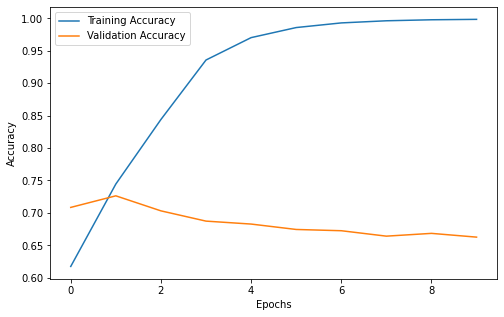

In [ ]:
plot_accuracy(history)

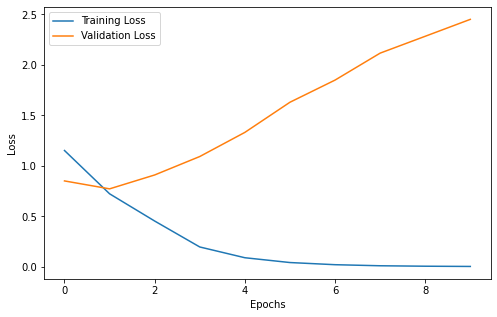

In [ ]:
plot_loss(history)

In [ ]:
from keras.models import load_model

# Save the model
model.save('model1.h5')


In [ ]:
# Download the model file
from google.colab import files
files.download('model1.h5')

loaded_model = load_model('model1.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/dataset/test.csv')

In [ ]:
test.head()

,id,title,abstract
0,2107.01095,Who Votes for Library Bonds? A Principal Compo...,Previous research has shown a relationship b...
1,1906.08519,Crystal structure and the magnetic properties ...,We synthesized the 5d1-transition metal oxid...
2,2105.05523,Trimmed extreme value estimators for censored ...,We consider estimation of the extreme value ...
3,1906.08731,Gray-box Monitoring of Hyperproperties (Extend...,"Many important system properties, particular..."
4,1703.08445,On the sectional curvature along central confi...,In this paper we characterize planar central...


In [ ]:
#Preprocess and clean the test set as necessary
test_df = test.drop_duplicates(subset='title')

In [ ]:
#Cleaning test set
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub(' ', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text

test_df['abstract'] = test_df['abstract'].apply(clean_text)
test_df['title'] = test_df['title'].apply(clean_text)

<ipython-input-63-d210793e7402>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['abstract'] = test_df['abstract'].apply(clean_text)
<ipython-input-63-d210793e7402>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['title'] = test_df['title'].apply(clean_text)


In [ ]:
#Preparing the features
test_X1 = test_df['title'].values #same as X1
test_X2 = test_df['abstract'].values #same as X2

test_X = test_X1+test_X2 #same as texts

In [ ]:
# Tokenize the texts
tokenizer = Tokenizer()
tokenizer.fit_on_texts(test_X)
sequences = tokenizer.texts_to_sequences(test_X)

# Pad the sequences
max_length = max([len(s) for s in sequences])
test_data = pad_sequences(sequences, maxlen=max_length)

In [ ]:
test_data

array([[     0,      0,      0, ...,    245,    759,   4822],
       [     0,      0,      0, ...,   4645,     42,   4621],
       [     0,      0,      0, ...,  55507,   6517,      2],
       ...,
       [     0,      0,      0, ...,   2280,   2411,     23],
       [     0,      0,      0, ...,   1373, 117739, 117740],
       [     0,      0,      0, ...,    633,     27,     41]], dtype=int32)

In [ ]:
#Now, make predictions on test data.
# make predictions on test data
predictions =loaded_model.predict(test_data)

1369/1369 [==============================] - 12s 9ms/step


In [ ]:
predictions

array([[1.8721113e-01, 2.9404421e-04, 7.0811459e-03, ..., 1.8100886e-04,
        1.3596323e-06, 7.5438815e-01],
       [2.7452738e-04, 1.0176317e-03, 1.7470519e-06, ..., 3.9939032e-08,
        1.3869970e-05, 1.0518806e-06],
       [1.2381218e-03, 1.1723861e-05, 1.6688982e-07, ..., 8.6636142e-08,
        1.4303016e-08, 1.4622379e-09],
       ...,
       [3.1805420e-03, 2.8479822e-06, 9.9333245e-01, ..., 1.3906462e-07,
        3.4335747e-07, 4.2904931e-06],
       [8.1455642e-07, 8.8702734e-10, 3.0739324e-05, ..., 3.8565307e-07,
        6.5455623e-09, 9.9030055e-09],
       [1.1369459e-03, 4.4003911e-03, 9.1614038e-01, ..., 5.5227731e-04,
        2.3462551e-05, 1.4568446e-02]], dtype=float32)

In [ ]:
#Predicted labels are in encoded format
#Now, let's deocode them 
decoded_labels = le.inverse_transform(np.argmax(predictions, axis=1))

In [ ]:
decoded_labels

array(['stat', 'math', 'physics', ..., 'cs', 'gr-qc', 'cs'], dtype=object)

In [ ]:
#Let's see the format of test_df
test_df

,id,title,abstract
0,2107.01095,votes library bonds principal component explor...,previous research shown relationship voter cha...
1,1906.08519,crystal structure magnetic properties 5d trans...,synthesized 5d1 transition metal oxides aoso4 ...
2,2105.05523,trimmed extreme value estimators censored heav...,consider estimation extreme value index extrem...
3,1906.08731,gray box monitoring hyperproperties extended v...,many important system properties particularly ...
4,1703.08445,sectional curvature along central configurations,paper characterize planar central configuratio...
...,...,...,...
45323,1908.05557,towards automated machine learning evaluation ...,considerable growth interest industrial applic...
45324,2006.00502,defect deferred correction method based subgri...,alternative first step approximation based sub...
45325,2009.09826,learning safe neural network controllers barri...,provide novel approach synthesize controllers ...
45326,2007.06959,learning semantics enriched representation via...,medical images naturally associated rich seman...


In [ ]:
#Let's see what sample submission looks like
#kasto raicha sample submission vanera hereko
sample_submission = pd.read_csv('/content/drive/MyDrive/dataset/sample_submission.csv')

In [ ]:
sample_submission.head()

,id,category
0,2107.01095,q-fin
1,1906.08519,cond-mat
2,2105.05523,math
3,1906.08731,cs
4,1703.08445,math


In [ ]:
len(test_df), len(decoded_labels)

(43782, 43782)

In [ ]:
#Lets try to put our predictions in this format
test_df['category']= decoded_labels

<ipython-input-83-5eb2ce42d4d1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['category']= decoded_labels


In [ ]:
test_df.head()

,id,title,abstract,category
0,2107.01095,votes library bonds principal component explor...,previous research shown relationship voter cha...,stat
1,1906.08519,crystal structure magnetic properties 5d trans...,synthesized 5d1 transition metal oxides aoso4 ...,math
2,2105.05523,trimmed extreme value estimators censored heav...,consider estimation extreme value index extrem...,physics
3,1906.08731,gray box monitoring hyperproperties extended v...,many important system properties particularly ...,cs
4,1703.08445,sectional curvature along central configurations,paper characterize planar central configuratio...,gr-qc


In [ ]:
#Let's make it like the provided format
submission_df = test_df.drop(['title', 'abstract'], axis=1)

In [ ]:
submission_df.head()

,id,category
0,2107.01095,stat
1,1906.08519,math
2,2105.05523,physics
3,1906.08731,cs
4,1703.08445,gr-qc


In [ ]:
sample_submission.head()

,id,category
0,2107.01095,q-fin
1,1906.08519,cond-mat
2,2105.05523,math
3,1906.08731,cs
4,1703.08445,math
